## Observations and Insights 

%matplotlib inline

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata ,study_results, how="left", on="Mouse ID")
# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
uniquemice = len(combined_mouse_df["Mouse ID"].unique())
print(f"The number of mice in this study is {uniquemice}")

The number of mice in this study is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep = "last")
len(clean_df)

1888

In [4]:
# Checking the number of mice in the clean DataFrame.
micemice = len(clean_df["Mouse ID"].unique())
print(f"CHECK : The number of mice in this study is {micemice}")

CHECK : The number of mice in this study is 249


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
rmean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
rmedian = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
rvar = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
rstd = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
rsem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
print("Summary Statistics for tumor volume in each region")
SummaryStat_DF = pd.DataFrame({"Mean" : rmean,
                                  "Median" : rmedian,
                                  "Variance" : rvar,
                                  "Standard Deviation" : rstd,
                                "Standard Errors of the Mean" : rsem})
SummaryStat_DF



Summary Statistics for tumor volume in each region


,Mean,Median,Variance,Standard Deviation,Standard Errors of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
print("Summary Statistics for tumor volume in each region")
summary = clean_df.groupby("Drug Regimen").agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary




Summary Statistics for tumor volume in each region


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of mice')

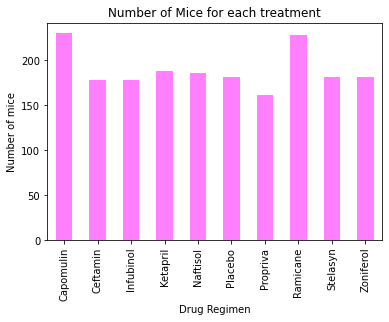

In [7]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Set x axis and tick locations
bardatamice = combined_mouse_df.groupby("Drug Regimen").count()["Mouse ID"]
bardatamice.plot.bar(title = "Number of Mice for each treatment",color = "magenta", alpha = 0.5)
plt.ylabel("Number of mice")

Text(0, 0.5, 'Number of mice')

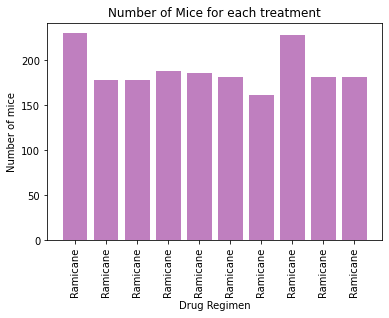

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(bardatamice))
plt.bar(x_axis, bardatamice, color='purple', alpha=0.5)
plt.xticks(x_axis, combined_mouse_df["Drug Regimen"], rotation="vertical")
plt.title("Number of Mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

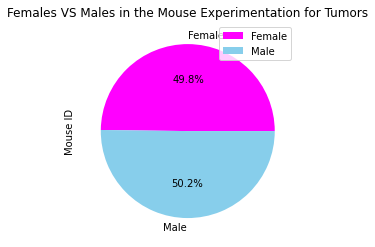

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_df = combined_mouse_df.groupby(["Sex"])
GenderCount = Gender_df["Mouse ID"].nunique()
GenderCount.plot.pie(autopct="%1.1f%%",colors = ["magenta", "skyblue"], title ="Females VS Males in the Mouse Experimentation for Tumors")
plt.legend()

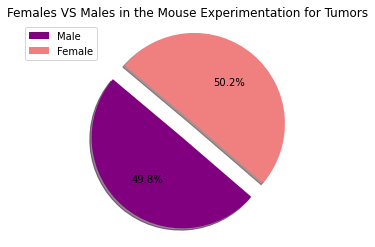

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
sizes = [GenderCount[0],GenderCount[1]]

# The colors of each section of the pie chart
colors = ["purple", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.2, 0)
plt.pie(sizes, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Females VS Males in the Mouse Experimentation for Tumors")
plt.legend(labels=labels)
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

Capomulin_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Capomulin", :]
Ramicane_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_mouse_df.loc[combined_mouse_df["Drug Regimen"] == "Ceftamin", :]

sorted_Ca_df = Capomulin_df.sort_values("Timepoint").drop_duplicates(subset=["Mouse ID"], keep = "last")
sorted_R_df = Ramicane_df .sort_values("Timepoint").drop_duplicates(subset=["Mouse ID"], keep = "last")
sorted_I_df = Infubinol_df.sort_values("Timepoint").drop_duplicates(subset=["Mouse ID"], keep = "last")
sorted_Ce_df = Ceftamin_df.sort_values("Timepoint").drop_duplicates(subset=["Mouse ID"], keep = "last")



In [12]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drugs = [sorted_Ca_df, sorted_R_df, sorted_I_df,sorted_Ce_df]
drugnames = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
lowerqs = []
upperqs= []
lowerbound = []
upperbound =[]
maxes = []
mins = []

for drug in drugs:
    quartiles = drug["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    maxd = drug["Tumor Volume (mm3)"].max()
    mind = drug["Tumor Volume (mm3)"].min()
    lowerqs.append(lowerq)
    upperqs.append(upperq)
    lowerbound.append(lower_bound)
    upperbound.append(upper_bound)
    maxes.append(maxd)
    mins.append(mind)
  
newdf = pd.DataFrame({
    'Drug Regimen': drugnames,
    'Lower Bound': lowerbound,
    'Upper Bound': upperbound,
    "Min":mins,
    "Max": maxes})  
print(newdf) 

  Drug Regimen  Lower Bound  Upper Bound        Min        Max
0    Capomulin    20.704562    51.832015  23.343598  47.685963
1     Ramicane    17.912664    54.306811  22.050126  45.220869
2    Infubinol    36.832905    82.741446  36.321346  72.226731
3     Ceftamin    25.355450    87.666458  45.000000  68.923185


In [13]:
# Determine outliers using upper and lower bounds
print("There are outliers potentially for Infubinol with some values below the Lowerbound, no outliers for the rest")


There are outliers potentially for Infubinol with some values below the Lowerbound, no outliers for the rest


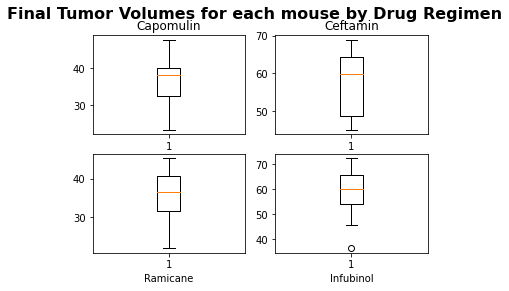

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots(2,2)
fig.suptitle("Final Tumor Volumes for each mouse by Drug Regimen", fontsize=16, fontweight="bold")

#ax1.set_xlim(min(year), max(year))
axs[0,0].boxplot(sorted_Ca_df["Tumor Volume (mm3)"])
axs[1,0].boxplot(sorted_R_df["Tumor Volume (mm3)"])
axs[1,1].boxplot(sorted_I_df["Tumor Volume (mm3)"])
axs[0,1].boxplot(sorted_Ce_df["Tumor Volume (mm3)"])
axs[0,0].set_title("Capomulin")
axs[1,0].set_xlabel("Ramicane")
axs[1,1].set_xlabel("Infubinol")
axs[0,1].set_title("Ceftamin")

plt.show()



## Line and Scatter Plots

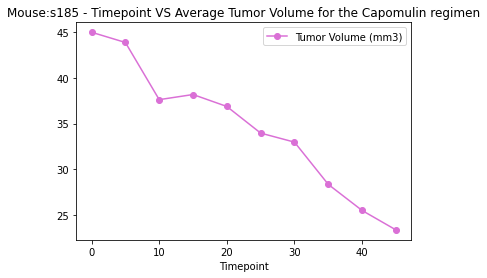

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
specialmouse_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185", :]
specialmouse_df.plot.line(x="Timepoint",y="Tumor Volume (mm3)", color ="orchid", marker = "o", title = "Mouse:s185 - Timepoint VS Average Tumor Volume for the Capomulin regimen")

Text(0.5, 1.0, 'Mouse Weight VS Average Tumor Volume for the Capomulin Regimen')

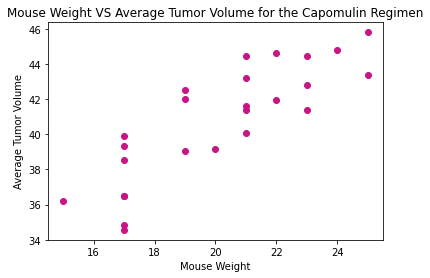

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg_df = Capomulin_df.groupby("Mouse ID").mean()
mouseweight = avg_df["Weight (g)"]
tumorvol = avg_df["Tumor Volume (mm3)"]
plt.scatter(mouseweight,tumorvol,color = "mediumvioletred", marker = "o")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Mouse Weight VS Average Tumor Volume for the Capomulin Regimen")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84
The regression equation is y = 0.95x + 21.55


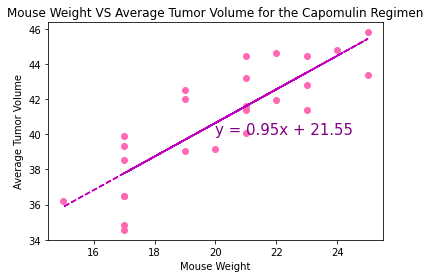

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between mouse weight and average tumor volume is {round(st.pearsonr(mouseweight,tumorvol)[0],2)}")
x_values = mouseweight
y_values1 = tumorvol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values1)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouseweight,tumorvol,color = "hotpink")
plt.plot(mouseweight,regress_values,"m--")
plt.annotate(line_eq,(20,40),fontsize=15,color="purple")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.title("Mouse Weight VS Average Tumor Volume for the Capomulin Regimen")
print(f"The regression equation is {line_eq}")